In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
chess = pd.read_csv("games.csv")
chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
chess.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


# Cleaning the dataset

In [10]:
# Checks for duplicate value
chess[chess.duplicated()]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply


In [11]:
# Remove the duplicates
chess = chess.drop_duplicates()
chess[chess.duplicated()]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply


# What is the longest game recorded in this dataset?

In [12]:
chess[chess['turns'] == chess['turns'].max()]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
11554,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13


# What is the shortest checkmate recorded?

In [13]:
chess_mate = chess[chess['victory_status'] == 'mate']

chess_mate[chess_mate['turns'] == chess_mate['turns'].min()]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
847,inyTCeV2,True,1.501670e+12,1.501670e+12,4,mate,black,10+0,duckduckfrog,1527,ducksandcats,1861,f4 e6 g4 Qh4#,A02,Bird Opening,1
862,eP09Yv7W,True,1.500090e+12,1.500090e+12,4,mate,black,10+0,duckduckfrog,1527,smartduckduckcow,1882,f4 e6 g4 Qh4#,A02,Bird Opening,1
864,V7a3QIoB,True,1.499910e+12,1.499910e+12,4,mate,black,10+0,duckduckfrog,1533,smartduckduckcow,1897,f4 e6 g4 Qh4#,A02,Bird Opening,1
867,pSa9EQDs,True,1.499910e+12,1.499910e+12,4,mate,black,10+0,duckduckfrog,1552,smartduckduckcow,1887,f4 e6 g4 Qh4#,A02,Bird Opening,1
1632,RRqJLTGb,False,1.491930e+12,1.491930e+12,4,mate,black,7+2,king-_-micah,1500,razzzzy,1238,f4 e6 g4 Qh4#,A02,Bird Opening,1
7602,B2bRaocj,False,1.484260e+12,1.484260e+12,4,mate,black,10+2,kreedome,1500,flawed,1829,f4 e5 g4 Qh4#,A02,Bird Opening: From's Gambit,2
12294,eP09Yv7W,True,1.500085e+12,1.500085e+12,4,mate,black,10+0,duckduckfrog,1527,smartduckduckcow,1882,f4 e6 g4 Qh4#,A02,Bird Opening,1
12296,V7a3QIoB,True,1.499905e+12,1.499905e+12,4,mate,black,10+0,duckduckfrog,1533,smartduckduckcow,1897,f4 e6 g4 Qh4#,A02,Bird Opening,1
12299,pSa9EQDs,True,1.499905e+12,1.499905e+12,4,mate,black,10+0,duckduckfrog,1552,smartduckduckcow,1887,f4 e6 g4 Qh4#,A02,Bird Opening,1
12324,inyTCeV2,True,1.501666e+12,1.501666e+12,4,mate,black,10+0,duckduckfrog,1527,ducksandcats,1861,f4 e6 g4 Qh4#,A02,Bird Opening,1


# Who wins more, white or black?

In [21]:
# of wins for each color
win_counts = chess['winner'].value_counts()
win_counts

winner
white    9792
black    8919
draw      918
Name: count, dtype: int64

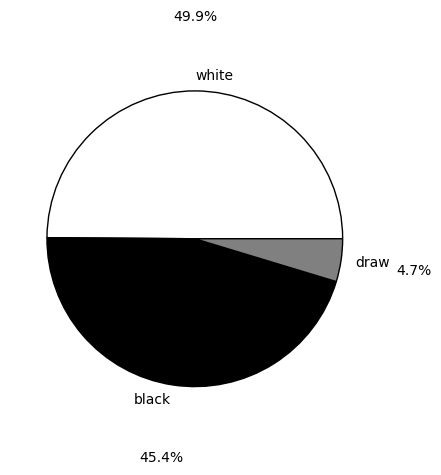

In [30]:
plt.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%', colors=['white', 'black','grey'], pctdistance=1.5, wedgeprops={'edgecolor': 'black'})

plt.show()


# How about the win percentages as the rating increases?

In [32]:
#Let's add a new row called avg_datasets
chess['avg_rating'] = chess[['white_rating', 'black_rating']].mean(axis=1)
chess

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,avg_rating
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1345.5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1446.5
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,1455.5
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,1214.5
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,1252.5
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,1293.5


In [35]:
#What is the max rating
chess[chess['avg_rating'] == chess['avg_rating'].max()]['avg_rating']

757    2475.5
Name: avg_rating, dtype: float64

In [36]:
#What is the min rating
chess[chess['avg_rating'] == chess['avg_rating'].min()]['avg_rating']

11467    816.5
Name: avg_rating, dtype: float64

In [38]:
#Creating the bins and the labels
bins = [800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2475.5]
labels = ['800-1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800','1800-2000','2000-2200','2200-2400']

In [39]:
#Create a new column that bins avg_rating
chess['avg_bin'] = pd.cut(chess['avg_rating'], bins=bins, labels=labels, right=False)
chess

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,avg_rating,avg_bin
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1345.5,1200-1400
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,1200-1400
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0,1400-1600
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1446.5,1400-1600
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1496.0,1400-1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,1455.5,1400-1600
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,1214.5,1200-1400
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,1252.5,1200-1400
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,1293.5,1200-1400


In [40]:
#group the winner counts
winner_counts = chess.groupby(['avg_bin', 'winner']).size().unstack(fill_value=0)
winner_counts

C:\Users\skvin\AppData\Local\Temp\ipykernel_35072\20109043.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  winner_counts = chess.groupby(['avg_bin', 'winner']).size().unstack(fill_value=0)


winner,black,draw,white
avg_bin,,,
800-1000,42,2,49
1000-1200,469,55,527
1200-1400,1593,127,1844
1400-1600,2747,242,2989
1600-1800,2088,223,2290
1800-2000,1323,159,1425
2000-2200,547,79,552
2200-2400,110,30,116


In [42]:
#Gets the percentage for the winners
winner_percents = winner_counts.divide(winner_counts.sum(axis=1), axis=0) * 100
winner_percents

winner,black,draw,white
avg_bin,,,
800-1000,45.161290,2.150538,52.688172
1000-1200,44.624167,5.233111,50.142721
1200-1400,44.696970,3.563412,51.739618
1400-1600,45.951823,4.048177,50.000000
1600-1800,45.381439,4.846772,49.771789
1800-2000,45.510836,5.469556,49.019608
2000-2200,46.434635,6.706282,46.859083
2200-2400,42.968750,11.718750,45.312500


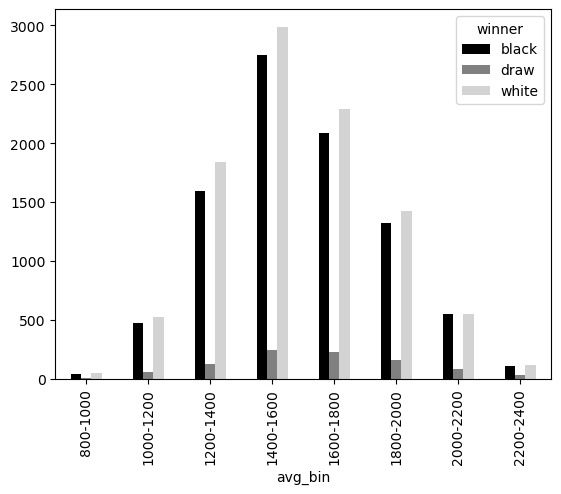

In [46]:
#Winner by counts. It shows a normal distribution
winner_counts.plot(kind='bar', color=['black', 'grey', 'lightgrey'])
plt.show()


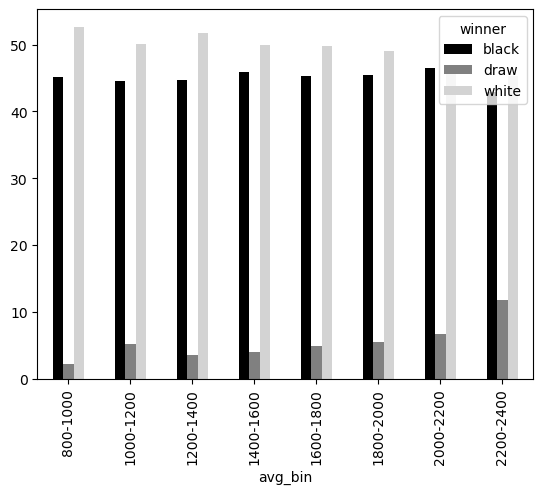

In [48]:
#Winner by percentage
winner_percents.plot(kind='bar', color=['black', 'grey', 'lightgrey'])
plt.show()


# What are the most successful openings?

In [50]:
#Let's first look at white
chess_white = chess[chess['winner'] == 'white']
chess_white

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,avg_rating,avg_bin
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1345.5,1200-1400
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0,1400-1600
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1446.5,1400-1600
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1496.0,1400-1600
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,1471.5,1400-1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20050,nYOvevdh,True,1.499814e+12,1.499814e+12,9,outoftime,white,10+0,jamboger,1243,yamaguchipolgar,1142,c4 e5 d4 exd4 Qxd4 Nf6 Bg5 Be7 e4,A20,English Opening: King's English Variation,2,1192.5,1000-1200
20052,EopEqqAa,True,1.499812e+12,1.499812e+12,37,resign,white,10+10,jamboger,1219,samael88,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4,1234.5,1200-1400
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,1455.5,1400-1600
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,1252.5,1200-1400


In [58]:
# of wins for each 
opening_counts = chess_white['opening_name'].value_counts()
opening_counts

opening_name
Scandinavian Defense: Mieses-Kotroc Variation                        159
Sicilian Defense                                                     147
Scotch Game                                                          141
French Defense: Knight Variation                                     133
Van't Kruijs Opening                                                 123
                                                                    ... 
King's Gambit Accepted |  Bishop's Gambit |  Bogoljubov Variation      1
Ruy Lopez: Noah's Ark Trap                                             1
Ruy Lopez: Closed Variations |  Martinez Variation                     1
Italian Game: Scotch Gambit |  de Riviere Defense                      1
Lion Defense: Anti-Philidor |  Lion's Cave                             1
Name: count, Length: 1181, dtype: int64

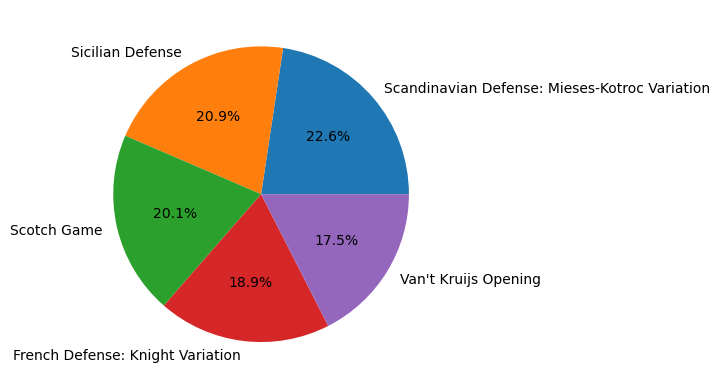

In [60]:
plt.pie(opening_counts[:5], labels=opening_counts[:5].index, autopct='%1.1f%%')

plt.show()

In [61]:
#Now, we look at black
chess_black = chess[chess['winner'] == 'black']
chess_black

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,avg_rating,avg_bin
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,1200-1400
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5,1760.5,1600-1800
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6,1415.5,1400-1600
11,Vf5fKWzI,False,1.503350e+12,1.503350e+12,38,resign,black,20+60,daniel_likes_chess,1381,subham777,1867,e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be3 Qxb2 Nbd2...,C02,French Defense: Advance Variation | Paulsen A...,9,1624.0,1600-1800
12,HRti5mKv,False,1.503350e+12,1.503350e+12,60,resign,black,5+40,daniel_likes_chess,1381,roman12342005,1936,e4 e6 Nf3 d5 exd5 exd5 Qe2+ Be7 Nc3 Nf6 d4 O-O...,C00,French Defense: Knight Variation,3,1658.5,1600-1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20041,B4IEyQyb,True,1.500157e+12,1.500158e+12,58,mate,black,10+10,jamboger,1263,kevineclmans,1770,d4 d5 Bf4 Bf5 e3 Nf6 c3 e6 Nf3 Nh5 Bg5 f6 Bh4 ...,D00,Queen's Pawn Game: Mason Attack,3,1516.5,1400-1600
20046,tM5wivnc,True,1.499871e+12,1.499871e+12,36,mate,black,10+10,mateuslichess,1250,jamboger,1235,e4 d6 d4 Nf6 e5 dxe5 Be2 exd4 Nf3 Nc6 O-O e5 B...,B07,Pirc Defense,4,1242.5,1200-1400
20051,uMzb0TPC,True,1.499812e+12,1.499813e+12,58,mate,black,10+10,samael88,1237,jamboger,1231,e4 e6 Nf3 d5 Bb5+ Bd7 c4 c6 Ba4 Qa5 b3 b5 cxb5...,C00,French Defense: Knight Variation,3,1234.0,1200-1400
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,1214.5,1200-1400


In [62]:
# of wins for each 
opening_counts = chess_black['opening_name'].value_counts()
opening_counts

opening_name
Van't Kruijs Opening                                                     224
Sicilian Defense                                                         191
Sicilian Defense: Bowdler Attack                                         162
Scandinavian Defense                                                     122
French Defense: Knight Variation                                         118
                                                                        ... 
King's Gambit Accepted |  Greco Gambit                                     1
King's Gambit Accepted |  Abbazia Defense                                  1
Scotch Game: Fraser Variation                                              1
Four Knights Game: Spanish Variation |  Rubinstein Variation Accepted      1
Pirc Defense: Austrian Attack |  Dragon Formation                          1
Name: count, Length: 1145, dtype: int64

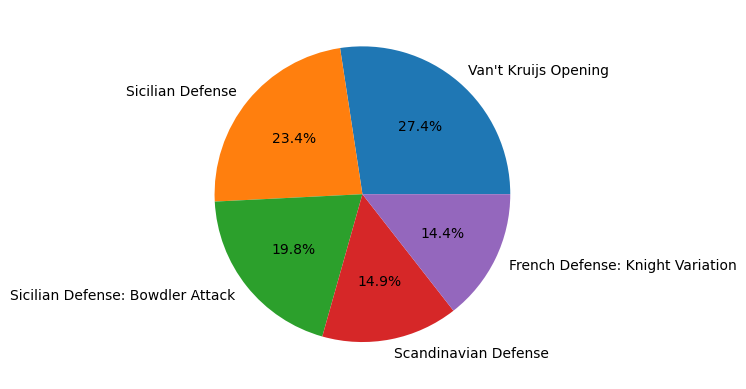

In [63]:
plt.pie(opening_counts[:5], labels=opening_counts[:5].index, autopct='%1.1f%%')

plt.show()